In [ ]:
from urllib import request
url = "https://raw.githubusercontent.com/Thomas19SA1247/Tugas-Self-Learning/main/siobot.json"
request.urlretrieve(url, "siobot.json")

('siobot.json', <http.client.HTTPMessage at 0x7f3645724b50>)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip -q install SpeechRecognition

     |████████████████████████████████| 32.8 MB 71.0 MB/s 


In [ ]:
!pip -q install gtts

In [ ]:
import json
import nltk
import time
import random
import string
import pickle
import numpy as np
import pandas as pd
from gtts import gTTS
from io import BytesIO
import tensorflow as tf
import IPython.display as ipd
import speech_recognition as sr 
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPool1D

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Importing the dataset
with open('/content/siobot.json') as content:
  data1 = json.load(content)

# Mendapatkan semua data ke dalam list
tags = []
inputs = []
responses = {}
words = []
classes = []
documents = []
ignore_words = ['?', '!']

for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      # add to our classes list
      if intent['tag'] not in classes:
        classes.append(intent['tag'])

# Konversi data json ke dalam dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags})

In [ ]:
# Cetak data keseluruhan
data

,patterns,tags
0,hallo,greeting
1,hai,greeting
2,halo,greeting
3,hei,greeting
4,hi,greeting
...,...,...
59,Apa saja yang kita pelajari di AI Mastery Progam?,pembelajaran_aimasteryprogam
60,Kita nanti belajar apa saja di AI Mastery Progam?,pembelajaran_aimasteryprogam
61,Apasi yang kita dapatkan nanti jika memilih AI...,pembelajaran_aimasteryprogam
62,Bagaimana jam pembelajaran di Studi Independen...,jam_pembelajaran_orbit


In [ ]:
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

In [ ]:
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

print (len(words), "unique lemmatized words", words)

90 unique lemmatized words [',', '4', 'academy', 'afternoon', 'ai', 'apa', 'apabila', 'apasi', 'bagaimana', 'bai', 'banyak', 'belajar', 'berapa', 'bro', 'bye', 'byee', 'cara', 'cocok', 'dadah', 'dah', 'dalam', 'dan', 'dapatkan', 'dari', 'dengan', 'di', 'dimaksud', 'dimulai', 'future', 'good', 'hai', 'hallo', 'halo', 'hei', 'hi', 'hy', 'independen', 'itu', 'jam', 'jika', 'job', 'jumpa', 'kamu', 'kasih', 'kawan', 'kemampuan', 'kira', 'kita', 'makasih', 'malam', 'manfaat', 'mastery', 'membuat', 'memilih', 'mendaftar', 'mengikuti', 'morning', 'nanti', 'orbit', 'pagi', 'pelajari', 'pelaksanaan', 'pembelajaran', 'pembuatmu', 'penciptamu', 'periode', 'persyaratan', 'progam', 'program', 'saja', 'sampai', 'saya', 'see', 'selamat', 'sesuai', 'si', 'siang', 'siapa', 'siobot', 'sore', 'studi', 'terdaftar', 'terima', 'thank', 'thanks', 'tinggal', 'untuk', 'waktu', 'yang', 'you']


In [ ]:
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)

17 classes ['SIOBOT', 'goodbye', 'greeting', 'jam_pembelajaran_orbit', 'manfaat_studi_independen', 'pembelajaran_ai4jobs', 'pembelajaran_aimasteryprogam', 'pencipta_siobot', 'penjelasan_ai4jobs', 'penjelasan_aimasteryprogam', 'penjelasan_orbit', 'penjelasan_studi_independen', 'periode_dan_pendaftaran_studi_independen', 'persyaratan_studi_independen', 'progam_orbit', 'rekomendasi_progam', 'terimakasih']


In [ ]:
print (len(documents), "documents")

422 documents


In [ ]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
train

[[39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [1, 10, 19],
 [20, 19],
 [20, 54],
 [19, 4, 55, 56, 20],
 [20, 57, 19],
 [58],
 [59],
 [27],
 [60],
 [61, 27],
 [62, 63],
 [64, 65],
 [66],
 [67, 28],
 [68],
 [69, 28],
 [29, 30],
 [70],
 [29, 30, 71],
 [1, 10, 6, 7],
 [1, 4, 72, 73, 6, 7],
 [1, 74, 6, 7],
 [1, 5, 75, 6, 7],
 [31, 76, 77, 78, 79, 80, 81, 6, 7],
 [1, 5, 82, 83, 84, 6, 7],
 [1, 10, 13, 14, 15],
 [12, 13, 14, 15],
 [13, 14, 15, 10, 12],
 [1, 5, 2, 32, 13, 14, 15, 4, 33, 34, 6, 7],
 [2, 1, 5, 4, 33, 34, 6, 7, 11, 13, 14, 15],
 [1, 10, 2, 3, 16, 17],
 [3, 16, 17, 10, 1],
 [12, 3, 16, 17],
 [1, 10, 2, 3, 8, 2],
 [3, 8, 2, 10, 1],
 [12, 3, 8, 2],
 [1, 2, 4, 85, 35, 86, 36],
 [37, 37, 2, 1, 4, 87, 35, 36],
 [1, 5, 4, 9, 21, 11, 3, 16, 17],
 [9, 18, 22, 1, 5, 11, 3, 16, 17],
 [12, 4, 9, 23, 18, 24, 25, 3, 16, 17],
 [1, 5, 4, 9, 21, 11, 3, 8, 2],
 [9, 18, 22, 1, 5, 11, 3, 8, 2],
 [12, 4, 9, 23, 18, 24, 25, 3, 8, 2],
 [1, 5, 

In [ ]:
# Apply padding 
x_train = pad_sequences(train)
print(x_train) # Padding Sequences

[[ 0  0  0  0  0  0  0  0  0  0  0 39]
 [ 0  0  0  0  0  0  0  0  0  0  0 40]
 [ 0  0  0  0  0  0  0  0  0  0  0 41]
 [ 0  0  0  0  0  0  0  0  0  0  0 42]
 [ 0  0  0  0  0  0  0  0  0  0  0 43]
 [ 0  0  0  0  0  0  0  0  0  0  0 44]
 [ 0  0  0  0  0  0  0  0  0  0  0 45]
 [ 0  0  0  0  0  0  0  0  0  0  0 46]
 [ 0  0  0  0  0  0  0  0  0  0  0 47]
 [ 0  0  0  0  0  0  0  0  0  0  0 48]
 [ 0  0  0  0  0  0  0  0  0  0  0 49]
 [ 0  0  0  0  0  0  0  0  0  0  0 50]
 [ 0  0  0  0  0  0  0  0  0  0  0 51]
 [ 0  0  0  0  0  0  0  0  0  0  0 52]
 [ 0  0  0  0  0  0  0  0  0  0  0 53]
 [ 0  0  0  0  0  0  0  0  0  1 10 19]
 [ 0  0  0  0  0  0  0  0  0  0 20 19]
 [ 0  0  0  0  0  0  0  0  0  0 20 54]
 [ 0  0  0  0  0  0  0 19  4 55 56 20]
 [ 0  0  0  0  0  0  0  0  0 20 57 19]
 [ 0  0  0  0  0  0  0  0  0  0  0 58]
 [ 0  0  0  0  0  0  0  0  0  0  0 59]
 [ 0  0  0  0  0  0  0  0  0  0  0 27]
 [ 0  0  0  0  0  0  0  0  0  0  0 60]
 [ 0  0  0  0  0  0  0  0  0  0 61 27]
 [ 0  0  0  0  0  0  0  0

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])
print(y_train)

[ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  0  0  7  7  7  1  1  1  1
  1  1  1  1  1 16 16 16 16 16 11 11 11 13 12  4 10 10 10 14 14  8  8  8
  9  9  9 15 15  5  5  5  6  6  6  6  6  6  3  3]


In [ ]:
# input length
input_shape = x_train.shape[1]
print(input_shape)

12


In [ ]:
# define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)

# output length
output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique words :  90
output length:  17


In [ ]:
pickle.dump(words, open('/content/drive/MyDrive/chatbot/words.pkl', 'wb'))
pickle.dump(classes, open('/content/drive/MyDrive/chatbot/words.pkl', 'wb'))

In [ ]:
pickle.dump(le, open('le.pkl','wb'))
pickle.dump(tokenizer, open('tokenizers.pkl','wb'))

In [ ]:
# Creating the model (Membuat Modeling)
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i) # Layer Embedding
x = LSTM(10, return_sequences=True)(x) # Layer Long Short Term Memory
x = Flatten()(x) # Layer Flatten
x = Dense(output_length, activation="softmax")(x) # Layer Dense
model  = Model(i,x)

# Compiling the model (Kompilasi Model)
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

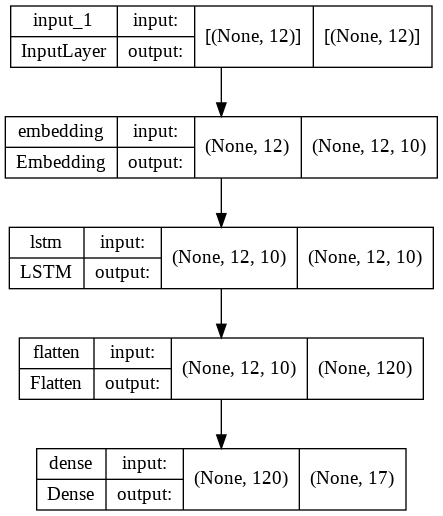

In [ ]:
# Visualization Plot Architecture Model (Visualisasi Plot Arsitektur Model)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Menampilkan Parameter Model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 embedding (Embedding)       (None, 12, 10)            910       
                                                                 
 lstm (LSTM)                 (None, 12, 10)            840       
                                                                 
 flatten (Flatten)           (None, 120)               0         
                                                                 
 dense (Dense)               (None, 17)                2057      
                                                                 
Total params: 3,807
Trainable params: 3,807
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model (Latih model data sampai 400 kali)
train = model.fit(x_train, y_train, epochs=400)

Epoch 1/400
2/2 [==============================] - 2s 9ms/step - loss: 2.8312 - accuracy: 0.0781
Epoch 2/400
2/2 [==============================] - 0s 9ms/step - loss: 2.8260 - accuracy: 0.1562
Epoch 3/400
2/2 [==============================] - 0s 9ms/step - loss: 2.8209 - accuracy: 0.2344
Epoch 4/400
2/2 [==============================] - 0s 8ms/step - loss: 2.8145 - accuracy: 0.2500
Epoch 5/400
2/2 [==============================] - 0s 12ms/step - loss: 2.8080 - accuracy: 0.2344
Epoch 6/400
2/2 [==============================] - 0s 9ms/step - loss: 2.8012 - accuracy: 0.2344
Epoch 7/400
2/2 [==============================] - 0s 8ms/step - loss: 2.7933 - accuracy: 0.2344
Epoch 8/400
2/2 [==============================] - 0s 8ms/step - loss: 2.7843 - accuracy: 0.2344
Epoch 9/400
2/2 [==============================] - 0s 11ms/step - loss: 2.7730 - accuracy: 0.2344
Epoch 10/400
2/2 [==============================] - 0s 8ms/step - loss: 2.7621 - accuracy: 0.2344
Epoch 11/400
2/2 [=========

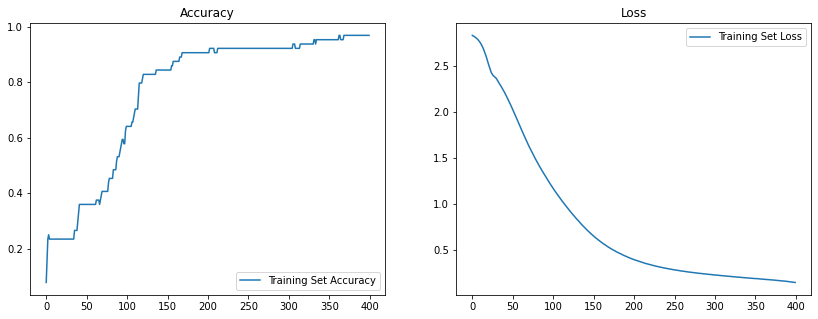

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'],label="Training Set Accuracy")
plt.legend(loc="lower right")
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(train.history['loss'],label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [ ]:
while True:
  texts_p = []
  prediction_input = input('👨‍🦰 Kamu : ')
  
  # Menghapus punktuasi dan konversi ke huruf kecil
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  # Tokenisasi dan Padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)  


  # Mendapatkan hasil keluaran pada model 
  output = model.predict(prediction_input)
  output = output.argmax()

  # Menemukan respon sesuai data tag dan memainkan voice bot
  response_tag = le.inverse_transform([output])[0]
  print("🤖 Siobot : ", random.choice(responses[response_tag]))
  tts = gTTS(random.choice(responses[response_tag]), lang='id')
  # Simpan model voice bot ke dalam Google Drive
  tts.save('/content/drive/MyDrive/chatbot/siobot.wav')
  time.sleep(0.08)
  # Load model voice bot from Google Drive
  ipd.display(ipd.Audio('/content/drive/MyDrive/chatbot/siobot.wav', autoplay=False))
  print("="*60 + "\n")
  # Tambahkan respon 'goodbye' agar bot bisa berhenti
  if response_tag == "goodbye":
    break
  

👨‍🦰 Kamu : hai
🤖 Siobot :  Hai! Siobot di sini. Mau tau informasi tentang apa nih?



👨‍🦰 Kamu : apa itu studi independen
🤖 Siobot :  Salah satu program Kampus Merdeka Kemendikbud yang bertujuan untuk mewujudkan gagasan mahasiswa dalam mengembangkan diri melalui aktivitas di luar perkuliahan dan menambah kompetensi spesifik serta praktis yang akan digunakan dalam dunia industri



👨‍🦰 Kamu : orbit future academy itu apa
🤖 Siobot :  Orbit Future Academy adalah inisiatif “Skills-for-Future-Jobs” oleh PT Orbit Ventura Indonesia. Kami mengkurasi dan melokalisasi program & kursus internasional untuk peningkatan keterampilan dan keterampilan ulang pemuda dan tenaga kerja menuju Pekerjaan Masa Depan. Orbit merupakan kelanjutan dari warisan Almarhum Dr Hasri Ainun Habibie dan Almarhum Prof Dr Ing. BJ Habibie , Presiden ke-3 Republik Indonesia.



👨‍🦰 Kamu : apa saja program studi independen orbit future academy
🤖 Siobot :  Program berlangsung selama 1 hingga 2 semester. Cara mendaftarnya dengan mengunjungi laman https://kampusmerdeka.kemdikbud.go.id/program/studi-independen



👨‍🦰 Kamu : Apa saja progam dari Orbit Future Academy yang terdaftar dalam Studi Independen
🤖 Siobot :  Progam Orbit Future Academy yang terdaftar dalam Studi Independen adalah AI 4 Jobs dan AI Mastery Progam



👨‍🦰 Kamu : apa itu AI 4 Jobs
🤖 Siobot :  Progam AI 4 Jobs adalah program pelatihan Artificial Intelligence secara online yang diperuntukkan bagi siswa dengan tujuan untuk memperkenalkan teknologi AI ke pelajar sekaligus juga untuk memberikan kesempatan kepada mereka untuk dapat mengaplikasikan perangkat AI, sehingga dapat menghasilkan suatu produk yang memiliki dampak sosial bagi komunitas mereka dan masyarakat umum dengan menitikberatkan kepada komponen utama AI seperti Data Science, Natural Language Processing, and Computer Vision.



👨‍🦰 Kamu : apa itu ai mastery program
🤖 Siobot :  Progam AI Mastery Progam adalah AI Mastery merupakan program pelatihan Artificial Intelligence secara online yang bertujuan memperkenalkan teknologi AI ke pelajar dan memberikan kesempatan kepada mereka untuk mengaplikasikannya dengan menyelesaikan project berbasis AI, sehingga dapat menghasilkan suatu produk yang memiliki dampak sosial bagi komunitas mereka dan masyarakat umum dengan menitikberatkan kepada Data Science, Natural Language Processing, atau Computer Vision.



👨‍🦰 Kamu : Kira kira progam apa yang cocok untuk saya
🤖 Siobot :  Jika kamu memiliki basic IT dapat memilih progam AI Mastery, tetapi jika tidak memiliki basic Siobot sarankan kamu memilih AI 4 Jobs



👨‍🦰 Kamu : Siobot, yang membuat kamu siapa?
🤖 Siobot :  Penciptaku berasal dari sekelompok mahasiswa yang random, sehingga saya bisa aktif saat ini!



👨‍🦰 Kamu : oke terimakasih
🤖 Siobot :  Halo! Saya Siobot, salam kenal ya! Mau tau tentang kampus merdeka, kan?



👨‍🦰 Kamu : terimakasih
🤖 Siobot :  Hai! Siobot di sini. Mau tau informasi tentang apa nih?



👨‍🦰 Kamu : apa itu ai 4 jobs
🤖 Siobot :  Progam AI 4 Jobs adalah program pelatihan Artificial Intelligence secara online yang diperuntukkan bagi siswa dengan tujuan untuk memperkenalkan teknologi AI ke pelajar sekaligus juga untuk memberikan kesempatan kepada mereka untuk dapat mengaplikasikan perangkat AI, sehingga dapat menghasilkan suatu produk yang memiliki dampak sosial bagi komunitas mereka dan masyarakat umum dengan menitikberatkan kepada komponen utama AI seperti Data Science, Natural Language Processing, and Computer Vision.



👨‍🦰 Kamu : apa saja yang kita pelajati di AI 4 Jobs
🤖 Siobot :  Yang kita pelajari di AI 4 Jobs adalah Logika dan Konsep Teknologi AI, Metode Penelitian AI, Siklus Projecet AI, Pemograman Python, Etika, Profesi dan Ketrampilan, dan yang terakhir Proyek Akhir



👨‍🦰 Kamu : waktu jam pembelajaran di mulai jam berapa
🤖 Siobot :  Jam pembelajaran di Studi Independen Orbit Future Academy dimulai dari jam 08.00 - 17.00 WIB. Itu dibagi menjadi 2 kegiatan. Jam 08.00 - 11.30 seacara online / ZOOM. Jam 13.00 - 17.00 kita belajar mandiri atau biasa disebut dengan Selt Learning



👨‍🦰 Kamu : Siobot, yang membuat kamu siapa?
🤖 Siobot :  Pembuat Siobot dari kalangan mahasiswa dan mahasiswi lho!



👨‍🦰 Kamu : dadah
🤖 Siobot :  Bye!


In [ ]:
# Simpan model dalam bentuk format file .h5 atau .pkl (pickle)
model.save('chat_model.h5')

print('Model Created Successfully!')

Model Created Successfully!
